In [ ]:
pwd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

In [ ]:
# df_clean = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\patient_chart_cleansing.csv')

In [ ]:
# df_clean.head()

In [ ]:
# df_original = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\all_patient_charts.csv')

In [ ]:
# df_original.head()

In [ ]:
df = pd.read_csv('C:\\Users\\rahmi\\OneDrive\\Desktop\\vital signs using federated learning\\dataset\\new_dataset.csv')

In [ ]:
# df.head()

In [ ]:
# df['label'] = 0

In [ ]:
# df.head()

In [ ]:
df.iloc[:,1]

In [ ]:
cols = ['spo2', 'bpm', 'rr', 'sbp', 'dbp', 'mbp']
df['merge_values'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis=1)

In [ ]:
df.head()

In [ ]:
all_values = df['merge_values'].str.split(pat="/")
all_values

In [ ]:
def diseases(symptoms):
    
    spo2 = float(symptoms[0])
    bpm = float(symptoms[1])
    rr = float(symptoms[2])
    mbp = float(symptoms[5])
    
    RED = (spo2<80) and ((rr>35) | (rr<8)) and (bpm>130) and (mbp<80)
    
    ORANGE = (((spo2)>80) and (spo2<90)) and (((rr)>31) and ((rr)<35)) and (((bpm>121) and (bpm<130)) | (bpm<40)) and\
    ((mbp>=80) and (mbp<=90))
    
    YELLOW = ((spo2>90) and (spo2<94)) and ((rr>26) and (rr<30)) and (((bpm>111) and (bpm<120)) | ((bpm>40) and (bpm<49))) 
    
    GREEN = (spo2>=95) and ((rr>8) and (rr<25)) and ((bpm>50) and (bpm<110)) 
    
    if RED:
        red = 1
        return red
    if ORANGE:
        orange = 2
        return orange
    if YELLOW:
        yellow = 3
        return yellow
    if GREEN:
        green = 4
        return green
    else:
        normal = 0
        return normal

In [ ]:
df['labels'] = all_values.apply(diseases)

In [ ]:
df.drop(['merge_values'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# df.to_csv('labeled_data.csv', index=False)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,Sequential
from sklearn.metrics import confusion_matrix

In [124]:
labeled_data = pd.read_csv('labeled_data.csv')

In [125]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,start_time,end_time,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,2166-10-06 02:44:00,2166-10-06 03:14:00,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,2166-10-06 03:44:00,2166-10-06 04:14:00,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,2166-10-06 04:44:00,2166-10-06 05:14:00,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,2166-10-06 05:44:00,2166-10-06 06:14:00,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,2166-10-06 06:44:00,2166-10-06 07:14:00,4


In [126]:
labeled_data = labeled_data.drop( ['start_time', 'end_time' ], axis=1)

In [127]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,4


In [128]:
labels = labeled_data.iloc[:,7]
num_labels = Counter(labels)
num_labels

Counter({4: 1227149, 0: 1063150, 3: 1655, 1: 63, 2: 12})

In [129]:
labeled_data['labels'].value_counts()

4    1227149
0    1063150
3       1655
1         63
2         12
Name: labels, dtype: int64

In [130]:
# sns.distplot(labeled_data['labels'])

In [131]:
# sns.pairplot(labeled_data,hue='labels',palette='coolwarm')

In [132]:
# sns.countplot(x='labels',data=labeled_data)

In [133]:
# plt.figure(figsize=(12,8))
# sns.heatmap(labeled_data.corr(), cmap='coolwarm', annot=True)

In [134]:
# sns.set_style('white')
# sns.countplot(x='labels',data=labeled_data)

In [135]:
# labeled_data['labels'].hist()

In [136]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,4


In [137]:
labeled_data= labeled_data[labeled_data.labels!= 0]

In [138]:
labeled_data.head()

,patient_id,spo2,bpm,rr,sbp,dbp,mbp,labels
0,11272192,97.0,63.5,18.0,112.0,78.0,87.0,4
1,11272192,96.0,64.0,16.0,106.0,71.0,81.0,4
2,11272192,95.0,61.0,15.0,105.0,65.0,78.0,4
3,11272192,96.0,63.0,23.0,102.0,65.0,76.0,4
4,11272192,97.0,57.0,18.0,105.0,75.0,84.0,4


In [139]:
labeled_data['labels'].value_counts()

4    1227149
3       1655
1         63
2         12
Name: labels, dtype: int64

In [140]:
X = labeled_data.iloc[:, 1:-1].values[:50000]

In [141]:
y = labeled_data.iloc[:, -1].values[:50000]

In [142]:
y

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [143]:
print(type(X))

<class 'numpy.ndarray'>


In [144]:
print(type(y))

<class 'numpy.ndarray'>


In [145]:
X.shape

(50000, 6)

In [146]:
print(X)

[[ 97.   63.5  18.  112.   78.   87. ]
 [ 96.   64.   16.  106.   71.   81. ]
 [ 95.   61.   15.  105.   65.   78. ]
 ...
 [ 99.   73.   19.  141.5  55.   86. ]
 [100.   73.   16.  134.   73.   94. ]
 [100.   76.   19.  133.   70.   90. ]]


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])

(35000, 6)
(35000,)
[4 4 4 4 4 4 4 4 4 4]


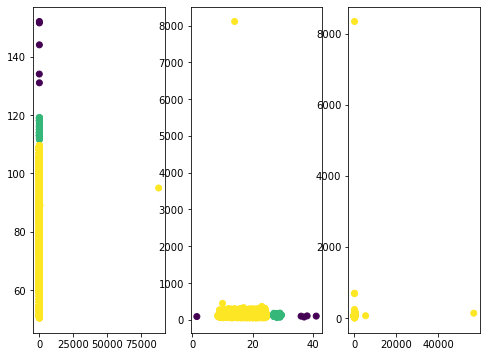

In [149]:
plt.figure(figsize=(8,6))

plt.subplot(1,3,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.subplot(1,3,2)
plt.scatter(X_train[:,2], X_train[:,3], c=y_train)

plt.subplot(1,3,3)
plt.scatter(X_train[:,4], X_train[:,5], c=y_train)

plt.show()

In [150]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [151]:
# y_test = tf.one_hot(y_test, depth=4)
# y_train = tf.one_hot(y_train, depth=4)

y_test = tf.one_hot(tf.cast(tf.reshape(y_test, -1), dtype=tf.int32), depth=4)
y_train = tf.one_hot(tf.cast(tf.reshape(y_train, -1), dtype=tf.int32), depth=4)


In [152]:
print(y_train[:10])

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(10, 4), dtype=float32)


In [153]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])

(35000, 6)
(35000, 4)
tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(10, 4), dtype=float32)


In [155]:
model = Sequential()

model.add(layers.Dense(128, input_shape=[6]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               896       
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 4)                 68        
                                                                 
Total params: 11,828
Trainable params: 11,828
Non-trainable params: 0
_________________________________________________________________


In [157]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
1094/1094 [==============================] - 3s 2ms/step - loss: 568.9268 - accuracy: 0.3103 - val_loss: 0.0000e+00 - val_accuracy: 0.0012
Epoch 2/30
1094/1094 [==============================] - 2s 2ms/step - loss: 16966.7734 - accuracy: 0.2690 - val_loss: 58530.7461 - val_accuracy: 0.0000e+00
Epoch 3/30
1094/1094 [==============================] - 2s 2ms/step - loss: 66787.2656 - accuracy: 0.2639 - val_loss: 0.0000e+00 - val_accuracy: 0.0012
Epoch 4/30
1094/1094 [==============================] - 2s 2ms/step - loss: 253880.8438 - accuracy: 0.2522 - val_loss: 7873.0581 - val_accuracy: 0.9988
Epoch 5/30
1094/1094 [==============================] - 2s 2ms/step - loss: 509518.0625 - accuracy: 0.2501 - val_loss: 1048121.6250 - val_accuracy: 0.9988
Epoch 6/30
1094/1094 [==============================] - 2s 2ms/step - loss: 835430.4375 - accuracy: 0.2618 - val_loss: 1107366.1250 - val_accuracy: 0.9988
Epoch 7/30
1094/1094 [==============================] - 2s 2ms/step - loss: 1744

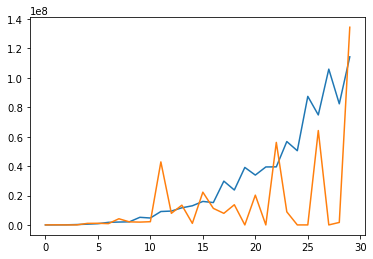

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [159]:
y_hat = model.predict(X_test)

In [160]:
print(y_hat[0])
print(y_test[0])

[1. 0. 0. 0.]
tf.Tensor([0. 0. 0. 0.], shape=(4,), dtype=float32)


In [161]:
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

In [162]:
print(y_hat[:10])
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [163]:
conf_matrix = confusion_matrix(y_test, y_hat)

In [164]:
print(conf_matrix)

[[14982     0]
 [   18     0]]


In [165]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[0,2]+conf_matrix[1,0]+conf_matrix[1,1]+conf_matrix[1,2]+conf_matrix[2,0]+conf_matrix[2,1]+conf_matrix[2,2])


IndexError: index 2 is out of bounds for axis 0 with size 2

In [166]:
print(accuracy)

0.0


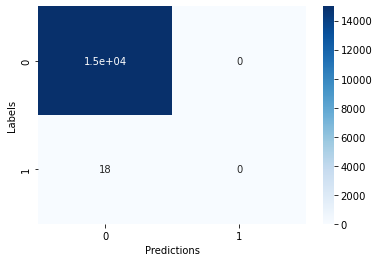

In [167]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.ylabel('Labels')
plt.xlabel('Predictions')
plt.show()